In [86]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import preprocessing
from boruta import BorutaPy
%matplotlib inline

# 1. Pre-Processing

### 1.1 Load Data

In [64]:
df = pd.read_csv('Resources/heart_attack_final_table.csv')
df.head()

,id,asthma_age,ever_overweight,heart_failure_age,age_chronic_heart_disease,angina_pectoris_age,heart_attack_age,stroke_age,thyroid_age,liver_age,...,100_Cigarettes,age,gender_female,gender_male,race_asian,race_black,race_mexican_american,race_other,race_other_hispanic,race_white
0,109266.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,29.0,1,0,1,0,0,0,0,0
1,109274.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,68.0,0,1,0,0,0,1,0,0
2,109292.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,58.0,0,1,0,0,0,0,1,0
3,109297.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,30.0,1,0,1,0,0,0,0,0
4,109307.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,47.0,0,1,1,0,0,0,0,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          5478 non-null   float64
 1   asthma_age                  5478 non-null   float64
 2   ever_overweight             5478 non-null   int64  
 3   heart_failure_age           5478 non-null   float64
 4   age_chronic_heart_disease   5478 non-null   float64
 5   angina_pectoris_age         5478 non-null   float64
 6   heart_attack_age            5478 non-null   float64
 7   stroke_age                  5478 non-null   float64
 8   thyroid_age                 5478 non-null   float64
 9   liver_age                   5478 non-null   float64
 10  fatty_liver                 5478 non-null   int64  
 11  liver_fibrosis              5478 non-null   int64  
 12  liver_cirrhosis             5478 non-null   int64  
 13  liver_viral_hepatitis       5478 

In [67]:
#remove columns that have null values and id since it is not useful for this
df = df.drop(['id'], axis=1)

### 1.2 Define Features Set and Target Vector

In [68]:
X = df.copy()
X.drop("heart_attack", axis=1, inplace=True)
X.head()

,asthma_age,ever_overweight,heart_failure_age,age_chronic_heart_disease,angina_pectoris_age,heart_attack_age,stroke_age,thyroid_age,liver_age,fatty_liver,...,100_Cigarettes,age,gender_female,gender_male,race_asian,race_black,race_mexican_american,race_other,race_other_hispanic,race_white
0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,29.0,1,0,1,0,0,0,0,0
1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,68.0,0,1,0,0,0,1,0,0
2,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,58.0,0,1,0,0,0,0,1,0
3,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,30.0,1,0,1,0,0,0,0,0
4,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,1,47.0,0,1,1,0,0,0,0,0


In [69]:
y = df["heart_attack"].ravel()
y[:5]

array([0, 0, 0, 0, 0])

### 1.3 Split into Training and Testing Data Sets

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### 1.4 Scale Data

In [71]:
scaler = StandardScaler()

In [72]:
X_scaler = scaler.fit(X_train)

In [73]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# 2. Create Random Forest

### 2.1 Fit the Model

In [74]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [75]:
rf_model = rf_model.fit(X_train_scaled, y_train)

### 2.2 Make Predictions

In [76]:
predictions = rf_model.predict(X_test_scaled)

### 2.3 Evaluate the Model

In [77]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [78]:
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1329,0
Actual 1,0,41


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1329
           1       1.00      1.00      1.00        41

    accuracy                           1.00      1370
   macro avg       1.00      1.00      1.00      1370
weighted avg       1.00      1.00      1.00      1370



# 3. Feature Importances

In [79]:
importances = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
# stroke age will be cutoff

[(0.36431350272532853, 'heart_attack_age'),
 (0.30893740856187185, 'max_age'),
 (0.09014577151651994, 'age_chronic_heart_disease'),
 (0.04968231241789587, 'angina_pectoris_age'),
 (0.046776427758636184, 'heart_failure_age'),
 (0.02951223022282327, 'asthma_age'),
 (0.029094497109833185, 'stroke_age'),
 (0.02184278847284709, 'asthma_yrs'),
 (0.014582294514992286, 'gallbladder_pr_age'),
 (0.00871104767719634, 'gallbladder_pr_yrs'),
 (0.005978546553633876, 'stroke_yrs'),
 (0.005522975643059068, 'thyroid_age'),
 (0.0050560363594767555, 'heart_failure_yrs'),
 (0.0038532798686955797, 'angina_pectoris_yrs'),
 (0.003448875172036428, 'liver_age'),
 (0.002396462873300074, 'liver_disease_yrs'),
 (0.0021802491954802253, 'chronic_heart_disease_yrs'),
 (0.0018507645421252973, 'age'),
 (0.0015549920362680778, 'Total_Cholesterol_mg_dL'),
 (0.0014726842978478594, 'thyroid_yrs'),
 (0.00048526545534407275, 'Frequency_of_Drinking'),
 (0.0003487732677767046, 'Drinks_per_Day'),
 (0.00028280650312885767, 'rel

<AxesSubplot:title={'center':'Features Importances'}, xlabel='Importance', ylabel='Feature'>

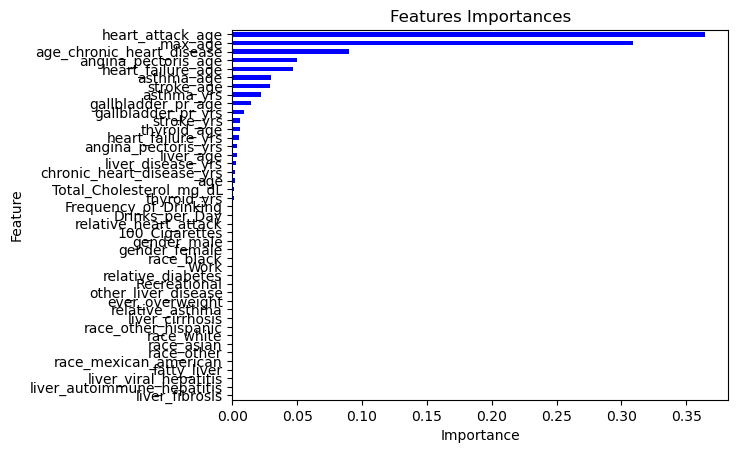

In [82]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='blue', title= 'Features Importances', ylabel='Feature',
                        xlabel='Importance', legend=False)

# 4. Boruta Feature Selection

In [91]:
X_boruta = df.iloc[:,:-1].values

In [92]:
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X_boruta, y)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1)

In [94]:
# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
feat_selector.fit(X_boruta, y)

# check selected features
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X_boruta)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	43
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	43
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	43
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	43
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	43
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	43
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	43
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	19
Tentative: 	9
Rejected: 	15
Iteration: 	9 / 100
Confirmed: 	19
Tentative: 	9
Rejected: 	15
Iteration: 	10 / 100
Confirmed: 	19
Tentative: 	9
Rejected: 	15
Iteration: 	11 / 100
Confirmed: 	19
Tentative: 	9
Rejected: 	15
Iteration: 	12 / 100
Confirmed: 	19
Tentative: 	9
Rejected: 	15
Iteration: 	13 / 100
Confirmed: 	19
Tentative: 	8
Rejected: 	16
Iteration: 	14 / 100
Confirmed: 	19
Tentative: 	8
Rejected: 	16
Iteration: 	15 / 100
Confirmed: 	19
Tentative: 	8
Rejected: 	16
Iteration: 	16 / 100
Confirmed: 	19
Tentative: 	8
Reject

In [100]:
column_names = X.columns.tolist()

In [101]:
# zip my names, ranks, and decisions in a single iterable
feature_ranks = list(zip(column_names,
                         feat_selector.ranking_, 
                         feat_selector.support_))

# iterate through and print out the results
for feat in feature_ranks:
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))

Feature: asthma_age                Rank: 1,  Keep: True
Feature: ever_overweight           Rank: 6,  Keep: False
Feature: heart_failure_age         Rank: 1,  Keep: True
Feature: age_chronic_heart_disease Rank: 1,  Keep: True
Feature: angina_pectoris_age       Rank: 1,  Keep: True
Feature: heart_attack_age          Rank: 1,  Keep: True
Feature: stroke_age                Rank: 1,  Keep: True
Feature: thyroid_age               Rank: 1,  Keep: True
Feature: liver_age                 Rank: 2,  Keep: False
Feature: fatty_liver               Rank: 18,  Keep: False
Feature: liver_fibrosis            Rank: 21,  Keep: False
Feature: liver_cirrhosis           Rank: 16,  Keep: False
Feature: liver_viral_hepatitis     Rank: 18,  Keep: False
Feature: liver_autoimmune_hepatitis Rank: 20,  Keep: False
Feature: other_liver_disease       Rank: 11,  Keep: False
Feature: gallbladder_pr_age        Rank: 1,  Keep: True
Feature: relative_asthma           Rank: 12,  Keep: False
Feature: relative_diabetes     